# Data pre-processing

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plots barplot with percentages for each value of column

def my_barplot(column):
    ax = pd.crosstab(df[column], df['class']).apply(lambda x: x/x.sum(), axis=1).plot.bar(figsize=(20,10))
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x(), p.get_height()))

In [3]:
df = pd.read_csv('data/selected_data.csv', encoding='latin1', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30702 entries, 0 to 30701
Data columns (total 39 columns):
average_pledge                           30702 non-null float64
backers_count                            30702 non-null int64
blurb                                    30702 non-null object
category_name                            30702 non-null object
category_parent                          30702 non-null object
category_position                        30702 non-null int64
country                                  30702 non-null object
currency                                 30702 non-null object
days_duration                            30702 non-null int64
days_preparation                         30702 non-null int64
days_remaining                           30702 non-null int64
days_running                             30702 non-null int64
db_description_full                      30691 non-null object
db_duration                              30702 non-null int64
db_image_url   

## Sampling

## Outlier detection

## Missing values resolution

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

db_description_full       11
db_image_url            9288
db_video_url           10259
location_state             7
dtype: int64

### 1. db_description_full

In [5]:
df[df['db_description_full'].isnull()]['url_name']

1013                                        michael-quatro
1014                                        michael-quatro
3594               mapo-worlds-first-connected-beauty-mask
3595               mapo-worlds-first-connected-beauty-mask
5077     copy-my-connected-tuitt-smart-home-automation-diy
15591                                            fps1000hd
20387                      aquiles-cinematographic-project
20388                      aquiles-cinematographic-project
23457     yaoi-life-as-he-knew-it-manga-volume-1-chapter-1
23748                           dagadam-watch-think-beyond
27328                   emme-technology-is-not-complicated
Name: url_name, dtype: object

In [6]:
# due to small number of projects without description (11) we can drop these projects
df = df[~df['db_description_full'].isnull()]

### 2. db_image_url
Missing values will be used in feature extraction process

### 3. db_video_url
Missing values will be used in feature extraction process

### 4. location_state

In [7]:
df[df['location_state'].isnull()][['url_name', 'location_name', 'location_state', 'location_type', 'country']]

,url_name,location_name,location_state,location_type,country
3054,the-white-desert-wildlife-and-antarctica-photo...,Antarctica,NaN,Country,US
7903,music-video-makedonsko-devojce-jazz-version,Skopje,NaN,Town,DE
16683,oualichi-gold-caribbean-erotica,Philipsburg,NaN,Town,US
21286,new-album-kickstarter,Road Town,NaN,Town,US
30232,baby-chef-cookbook-and-app-with-healthy-recipe...,Skopje,NaN,Town,AU
30347,ninos-otomies-le-cantan-al-papa-francisco,Vatican City,NaN,Town,MX
30389,portraits-of-place-in-antarctica-ii,Antarctica,NaN,Country,US


In [8]:
# there are many unique states, using them for prediction is bad idea
df['location_state'].nunique()

604

In [9]:
# however states are included in countries, so we can use country
df['country'].nunique()

22

In [10]:
# therefore it will probably not matter how we fill missing values, but let's do it this way:
df.loc[3054, 'location_state'] = 'None'
df.loc[7903, 'location_state'] = 'Macedonia'
df.loc[16683, 'location_state'] = 'Sint Maarten (Dutch part)'
df.loc[21286, 'location_state'] = 'Virgin Islands, U.S. '
df.loc[30232, 'location_state'] = 'Macedonia'
df.loc[30347, 'location_state'] = 'Vatican City'
df.loc[30389, 'location_state'] = 'None'

In [11]:
df[df['location_state'].isnull()][['url_name', 'location_name', 'location_state', 'location_type', 'country']]

,url_name,location_name,location_state,location_type,country


# Feature engineering

## Feature extraction

### 1. deadline

We will extract additional features from deadline timestamp (maybe some of them will be usefull):

* year
* month
* day
* day of week
* hour

In [12]:
# convert unix timestamp to datetime of scraping
df['deadline_datetime'] = pd.to_datetime(df['deadline_end'], unit='s')
df[['url_name','deadline_end','deadline_datetime']].sample(5)

,url_name,deadline_end,deadline_datetime
29314,stop-gangstalking-and-v2k,1504572375,2017-09-05 00:46:15
11360,andrew-van-tassel-new-album,1468522297,2016-07-14 18:51:37
16282,mlb-game-used-baseball-beanie-choose-your-team,1478708911,2016-11-09 16:28:31
9408,i-sing-the-body-electric,1466485140,2016-06-21 04:59:00
6043,adilahs-catering-cafe,1460761960,2016-04-15 23:12:40


#### 1.1 year

In [13]:
df['deadline_year'] = df['deadline_datetime'].dt.year

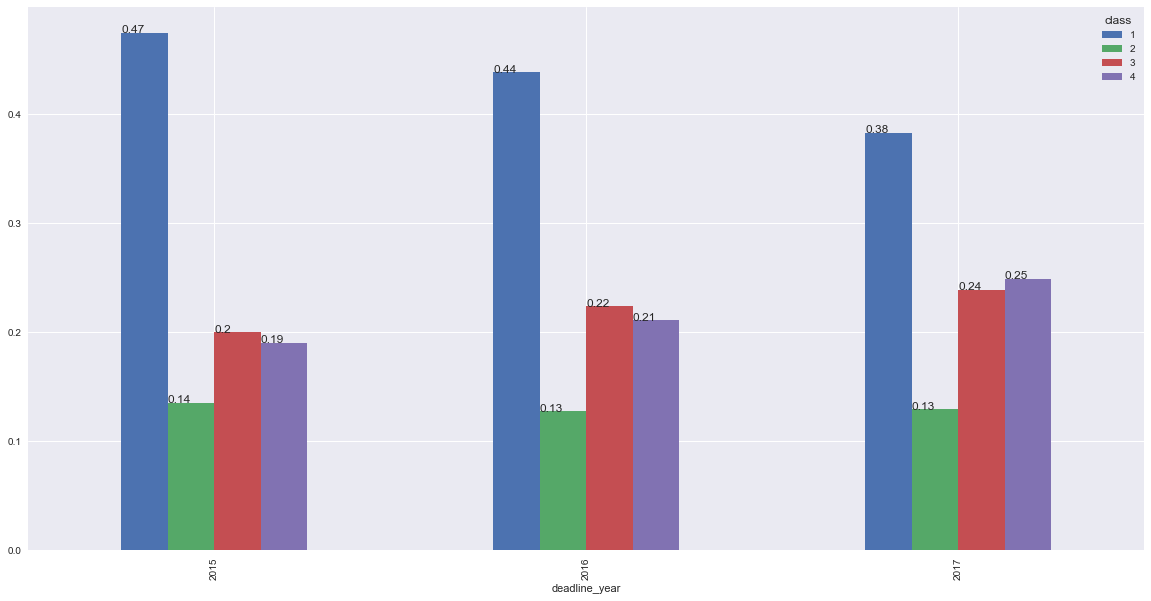

In [14]:
my_barplot('deadline_year')

#### 1.2 month

In [15]:
df['deadline_month'] = df['deadline_datetime'].dt.month

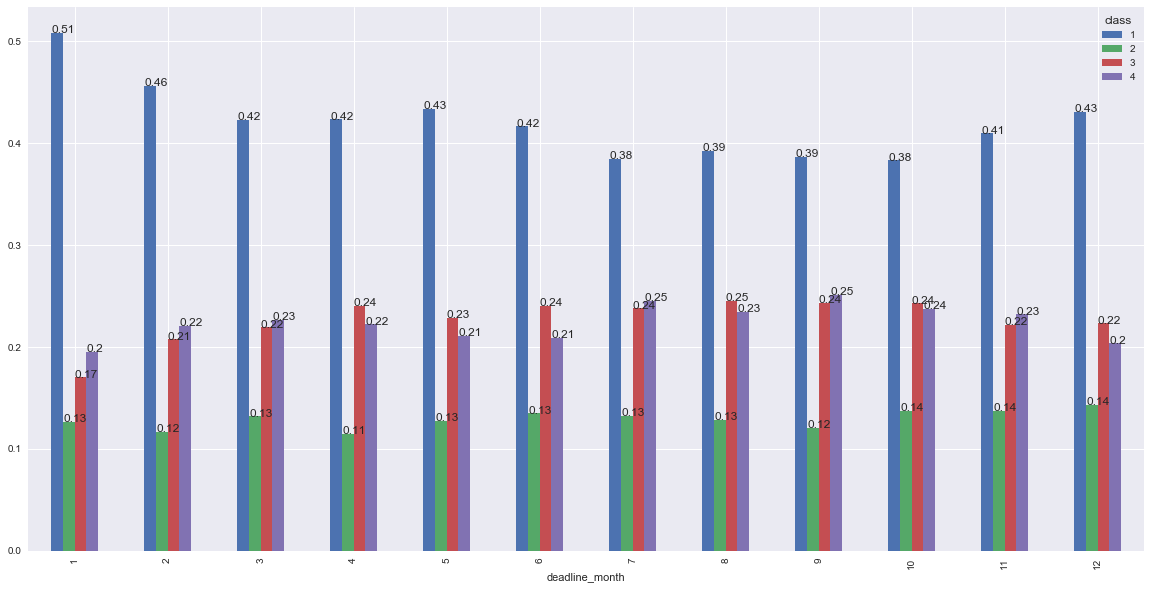

In [16]:
my_barplot('deadline_month')

#### 1.3 day

In [17]:
df['deadline_day'] = df['deadline_datetime'].dt.day

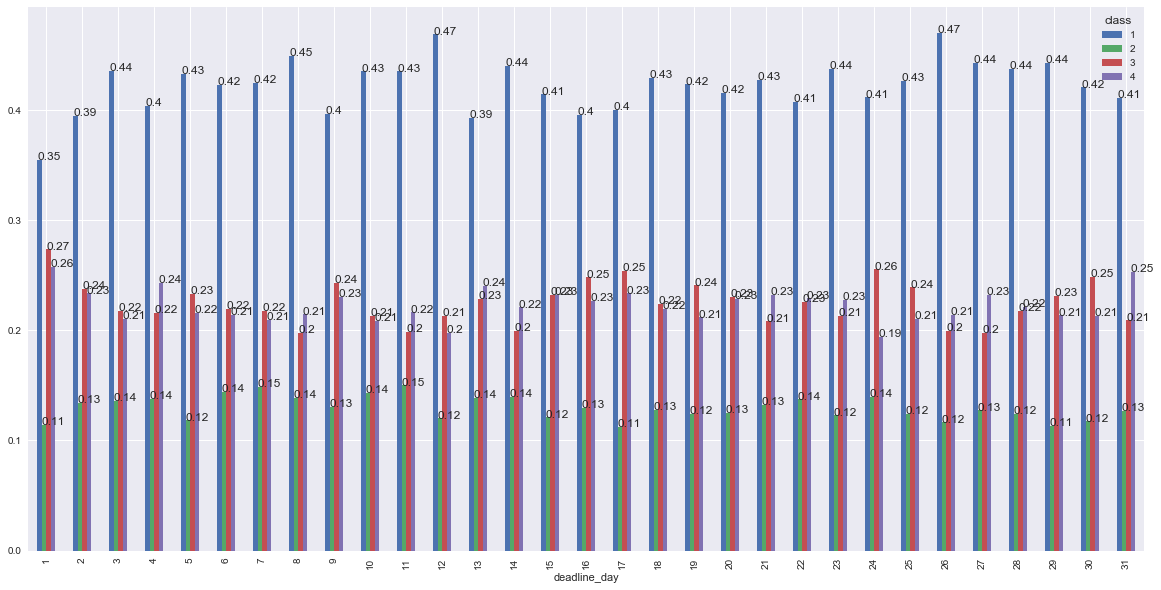

In [18]:
my_barplot('deadline_day')

#### 1.4 day of week

In [19]:
df['deadline_dayofweek'] = df['deadline_datetime'].dt.dayofweek

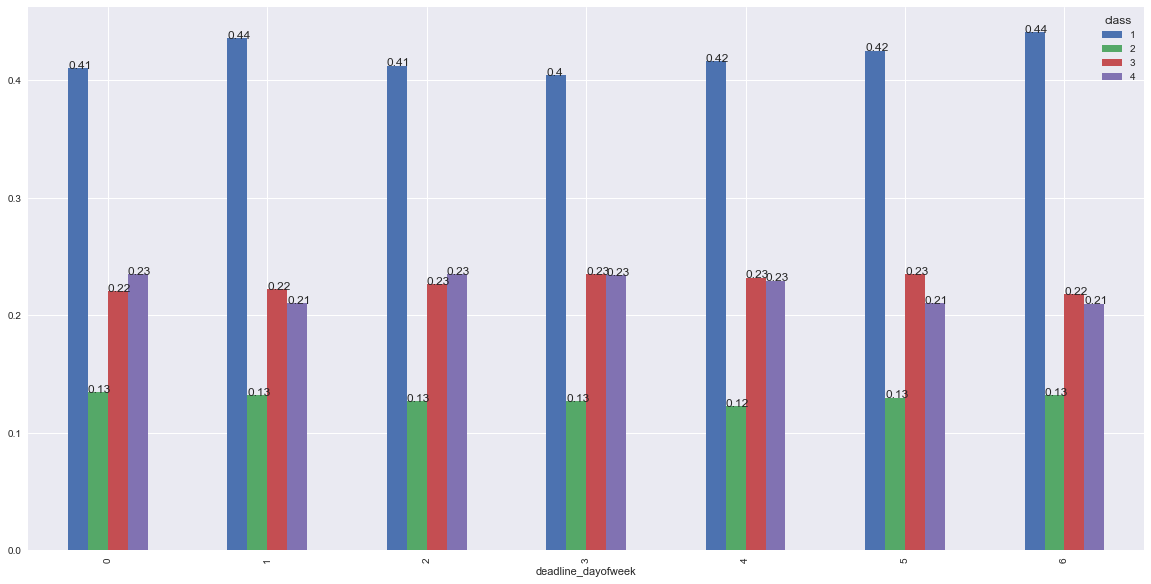

In [20]:
my_barplot('deadline_dayofweek')

#### 1.5 hour

In [21]:
df['deadline_hour'] = df['deadline_datetime'].dt.hour

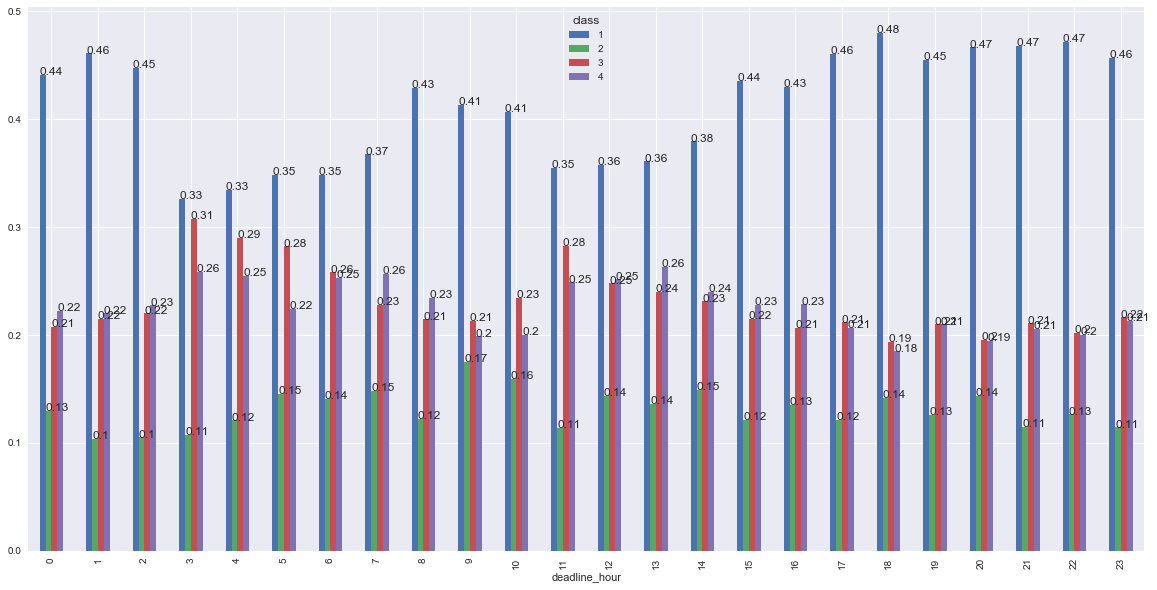

In [22]:
my_barplot('deadline_hour')

In [23]:
df.drop(['deadline_datetime', 'deadline_end'], axis=1, inplace=True)

### 2. launch

We will extract additional features from launch timestamp (maybe some of them will be usefull):

* year
* month
* day
* day of week
* hour

In [24]:
# convert unix timestamp to datetime
df['launch_datetime'] = pd.to_datetime(df['launched_at'], unit='s')
df[['url_name','launched_at','launch_datetime']].sample(5)

,url_name,launched_at,launch_datetime
6948,the-id-id-project-part-1,1458349338,2016-03-19 01:02:18
26349,kayleigh-omara-childrens-illustrated-alphabet-...,1492355868,2017-04-16 15:17:48
8806,music-star-network,1460399986,2016-04-11 18:39:46
12821,talking-points-double-album-release,1467329105,2016-06-30 23:25:05
28322,mark-gibson-band-live-from-soul-city,1499297045,2017-07-05 23:24:05


#### 2.1 year

In [25]:
df['launch_year'] = df['launch_datetime'].dt.year

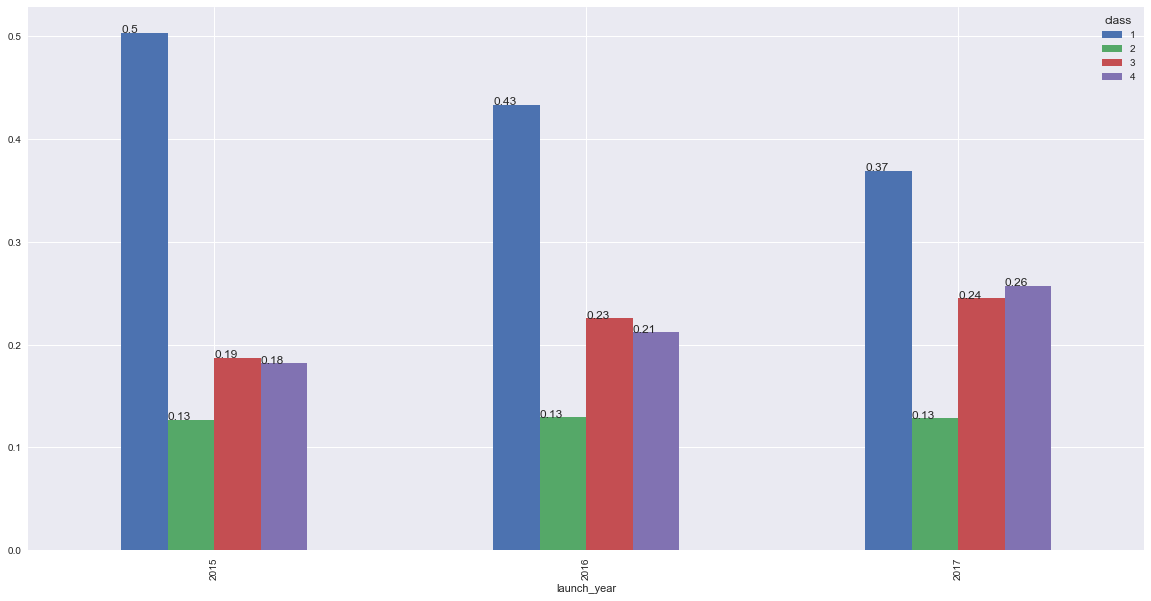

In [26]:
my_barplot('launch_year')

#### 2.2 month

In [27]:
df['launch_month'] = df['launch_datetime'].dt.month

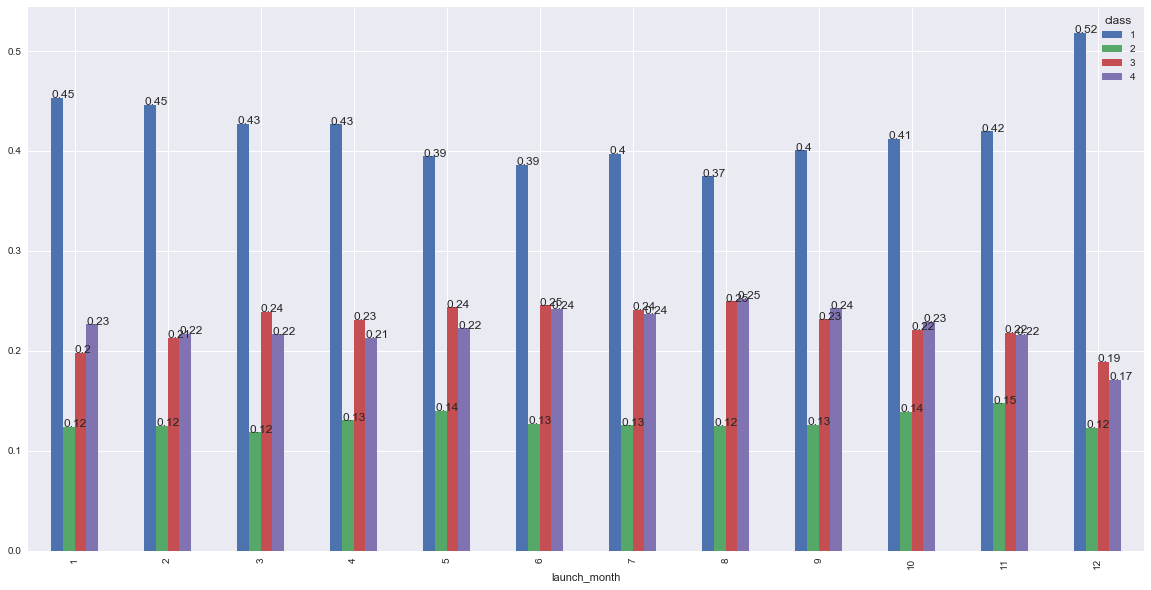

In [28]:
my_barplot('launch_month')

#### 2.3 day

In [29]:
df['launch_day'] = df['launch_datetime'].dt.day

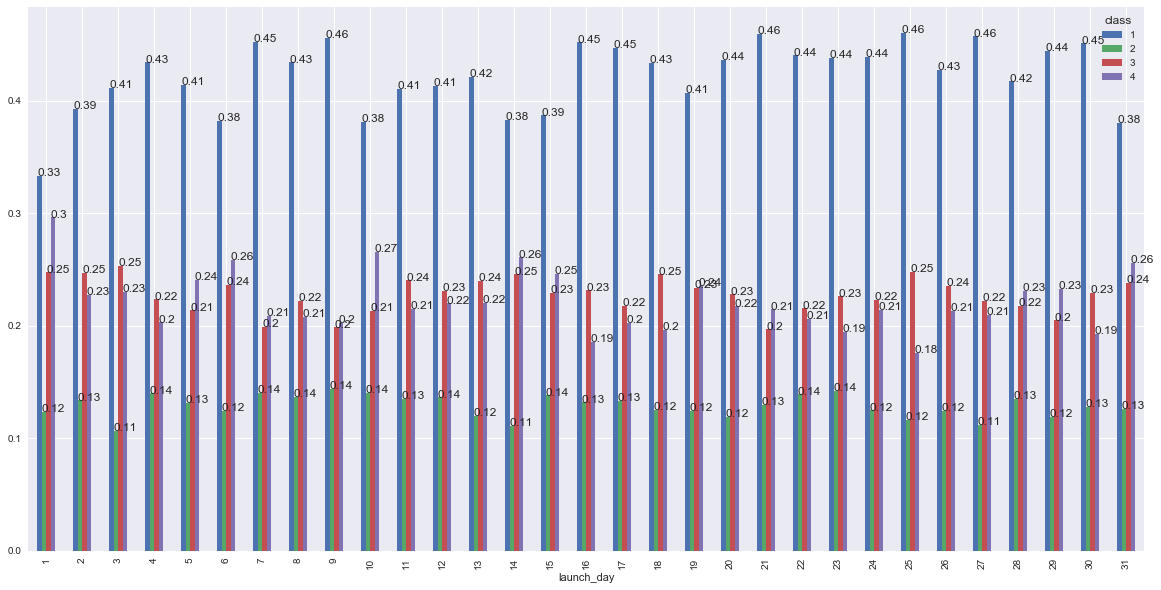

In [30]:
my_barplot('launch_day')

#### 2.4 day of week

In [31]:
df['launch_dayofweek'] = df['launch_datetime'].dt.dayofweek

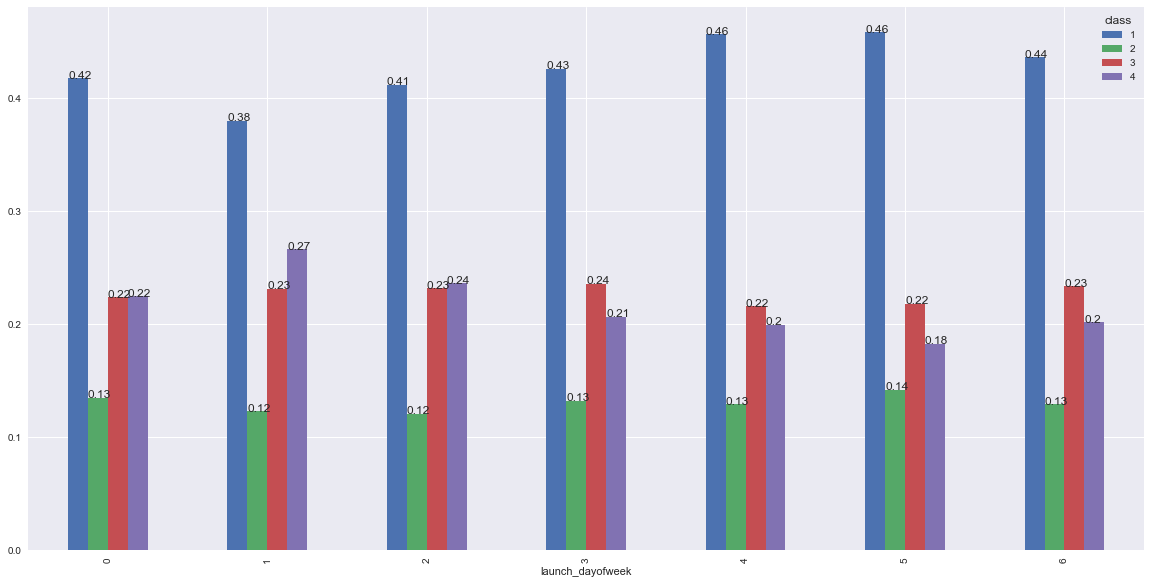

In [32]:
my_barplot('launch_dayofweek')

#### 2.5 hour

In [33]:
df['launch_hour'] = df['launch_datetime'].dt.hour

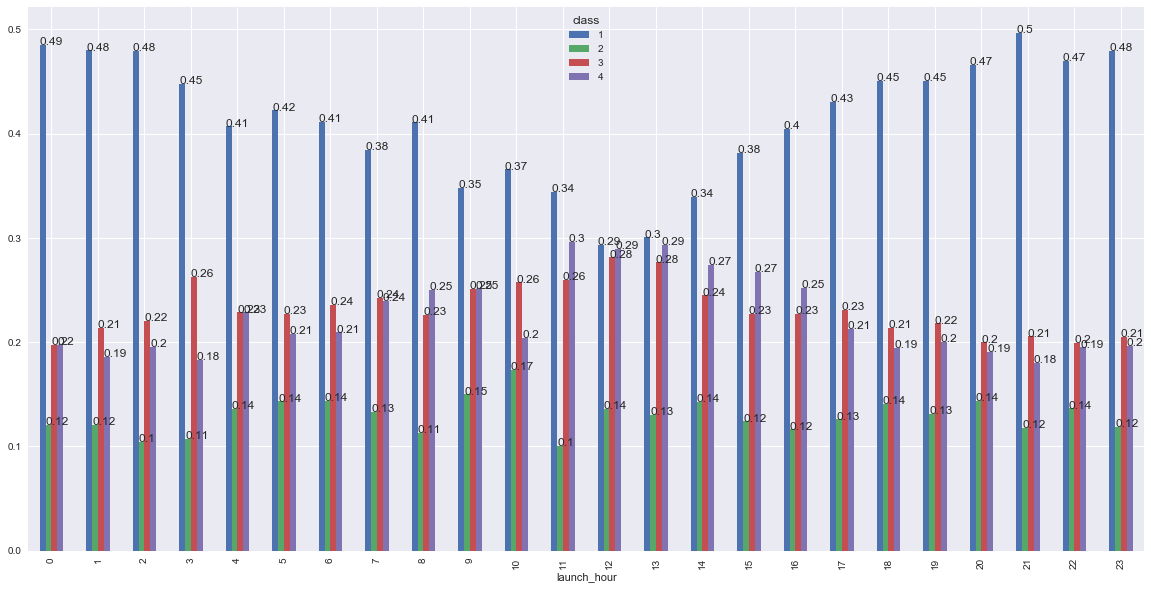

In [34]:
my_barplot('launch_hour')

In [35]:
df.drop(['launch_datetime', 'launched_at'], axis=1, inplace=True)

As we can see, there might be some trends, so keep all new features for now.

### 3. description

Project description contains HTML tags so we can count images, videos, audios, ...

#### 3.1 count of images

In [36]:
# extract image count from description
df['image_count'] = df['db_description_full'].apply(lambda x: str(x).count('<img'))

In [37]:
df['image_count'].describe()

count    30691.000000
mean         7.332117
std         11.626569
min          0.000000
25%          0.000000
50%          3.000000
75%         10.000000
max        185.000000
Name: image_count, dtype: float64

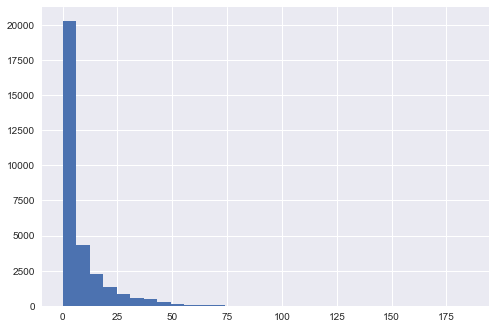

In [38]:
df['image_count'].hist(bins=30)

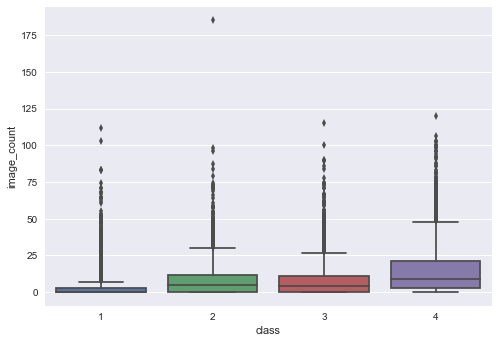

In [39]:
sns.boxplot(x=df['class'], y=df['image_count'])

In [40]:
df[df['image_count'] > 150][['url_name', 'image_count']]

,url_name,image_count
19800,the-worlds-smartest-modular-wifi-bluetooth-wea...,185


#### 3.2 count of videos

##### 3.2.1 kickstarter videos

In [41]:
# extract kickstarter video count from description
df['video_kickstarter_count'] = df['db_description_full'].apply(lambda x: str(x).count('<video'))

In [42]:
df['video_kickstarter_count'].describe()

count    30691.000000
mean         0.159851
std          0.697614
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: video_kickstarter_count, dtype: float64

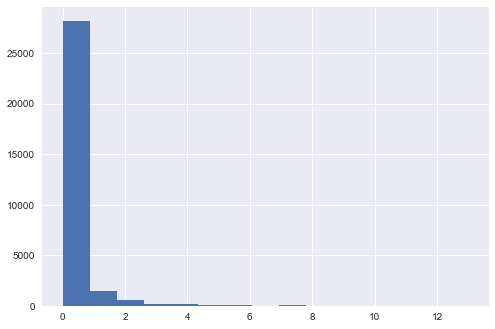

In [43]:
df['video_kickstarter_count'].hist(bins=15)

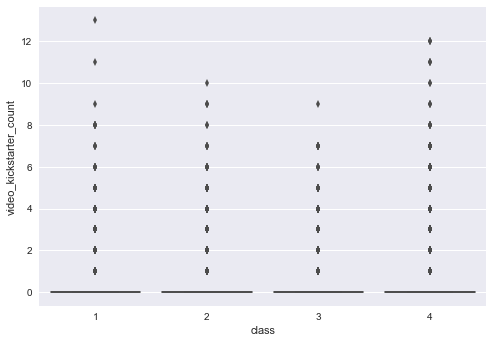

In [44]:
sns.boxplot(x=df['class'], y=df['video_kickstarter_count'])

##### 3.2.2 youtube videos

In [45]:
# extract youtube video count from description
df['video_youtube_count'] = df['db_description_full'].apply(lambda x: str(x).count('src="https://www.youtube.com/embed/'))

In [46]:
df['video_youtube_count'].describe()

count    30691.000000
mean         0.148513
std          0.713896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: video_youtube_count, dtype: float64

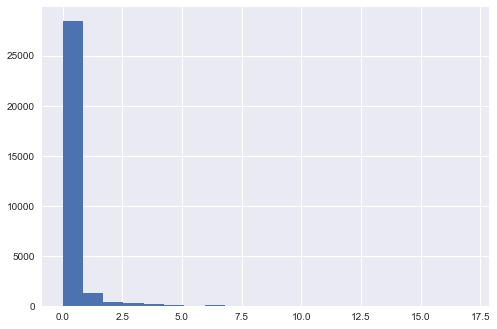

In [47]:
df['video_youtube_count'].hist(bins=20)

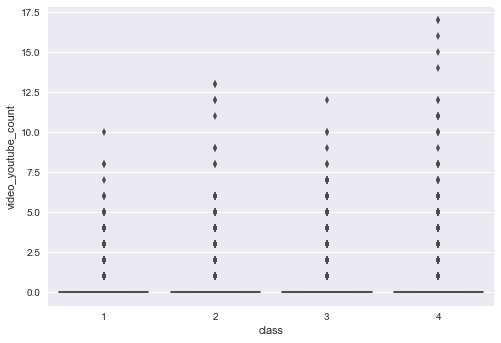

In [48]:
sns.boxplot(x=df['class'], y=df['video_youtube_count'])

In [49]:
# quick validation - ok
df[df['video_youtube_count'] > 15]['url_name']

1728                      the-wearable-camera-for-athletes
1789     7bot-a-powerful-desktop-robot-arm-for-future-i...
16299    fizzics-waytap-untap-the-full-taste-of-beer-wi...
Name: url_name, dtype: object

##### 3.2.3 videos total (kickstarter + youtube)

In [50]:
# sum video counts
df['video_count'] = df['video_kickstarter_count'] + df['video_youtube_count']

In [51]:
df['video_count'].describe()

count    30691.000000
mean         0.308364
std          1.027254
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.000000
Name: video_count, dtype: float64

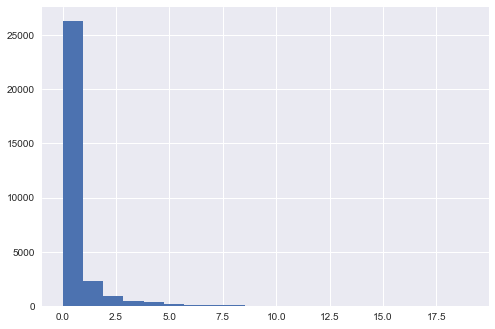

In [52]:
df['video_count'].hist(bins=20)

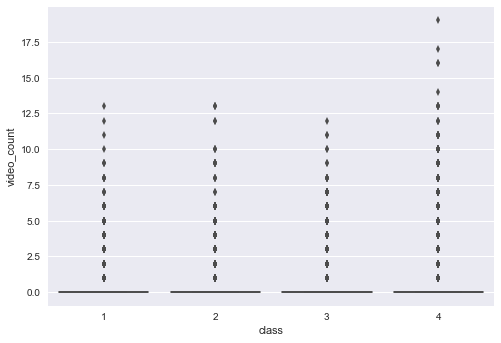

In [53]:
sns.boxplot(x=df['class'], y=df['video_count'])

#### 3.3 count of audio

In [54]:
# extract audio count from description
df['audio_count'] = df['db_description_full'].apply(lambda x: str(x).count('<audio'))

In [55]:
df['audio_count'].describe()

count    30691.000000
mean         0.023818
std          0.266373
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: audio_count, dtype: float64

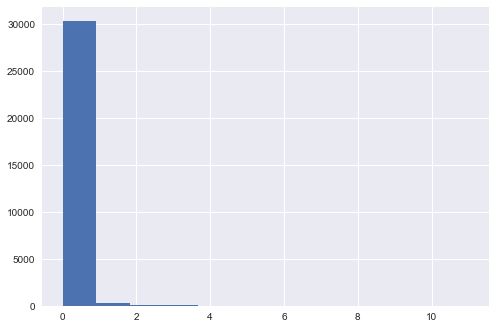

In [56]:
df['audio_count'].hist(bins=12)

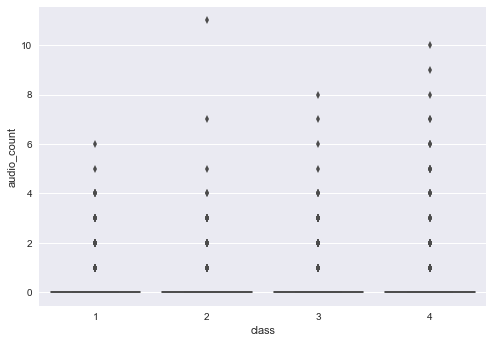

In [57]:
sns.boxplot(x=df['class'], y=df['audio_count'])

In [58]:
# quick validation - ok
df[df['audio_count'] > 10]['url_name']

20143    professor-grownup-cthulhu-album-for-kids
Name: url_name, dtype: object

#### 3.4 other embeded content

In [59]:
# can be literally anything - video, playlist, etc.
df['other_embeded_count'] = df['db_description_full'].apply(lambda x: str(x).count('<iframe'))

In [60]:
# youtube videos are also in iframe, so subtract them
df['other_embeded_count'] = (df['other_embeded_count'] - df['video_youtube_count'])

In [61]:
df['other_embeded_count'].describe()

count    30691.000000
mean         0.047897
std          0.418285
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.000000
Name: other_embeded_count, dtype: float64

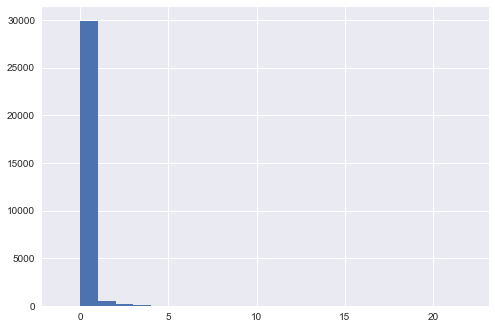

In [62]:
df['other_embeded_count'].hist(bins=23)

In [63]:
df[df['other_embeded_count'] < 0]['url_name']

1003    brad-jurjens-first-solo-album
Name: url_name, dtype: object

In [64]:
# there is no other embeded content - author did not use iframe as expected
# https://www.kickstarter.com/projects/1425431066/brad-jurjens-first-solo-album
df.loc[1003, 'other_embeded_count'] = 0

# TODO description

### 4. blurb = short description

Extract words count

In [65]:
df['blurb_words'] = df['blurb'].apply(lambda x: x.count(' ') + 1)

In [66]:
df['blurb_words'].describe()

count    30691.000000
mean        19.350005
std          4.729972
min          1.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         50.000000
Name: blurb_words, dtype: float64

In [67]:
df.drop('blurb', axis=1, inplace=True)

### 5. db_image_url and db_video_url

In 2nd dataset, there is image_url column.
Transform as follows:
* 0 where url is missing
* 1 otherwise

In [68]:
df.db_image_url.describe()

count                                                 21406
unique                                                18814
top       https://ksr-ugc.imgix.net/assets/012/367/264/9...
freq                                                      3
Name: db_image_url, dtype: object

In [69]:
df.db_image_url.fillna(0, inplace=True)

In [70]:
df.db_image_url = df.db_image_url.apply(lambda x: int(len(str(x)) > 1))

In [71]:
df.rename(index=str, columns={"db_image_url": "db_image"}, inplace=True)

In [72]:
df.db_image.value_counts()

1    21406
0     9285
Name: db_image, dtype: int64

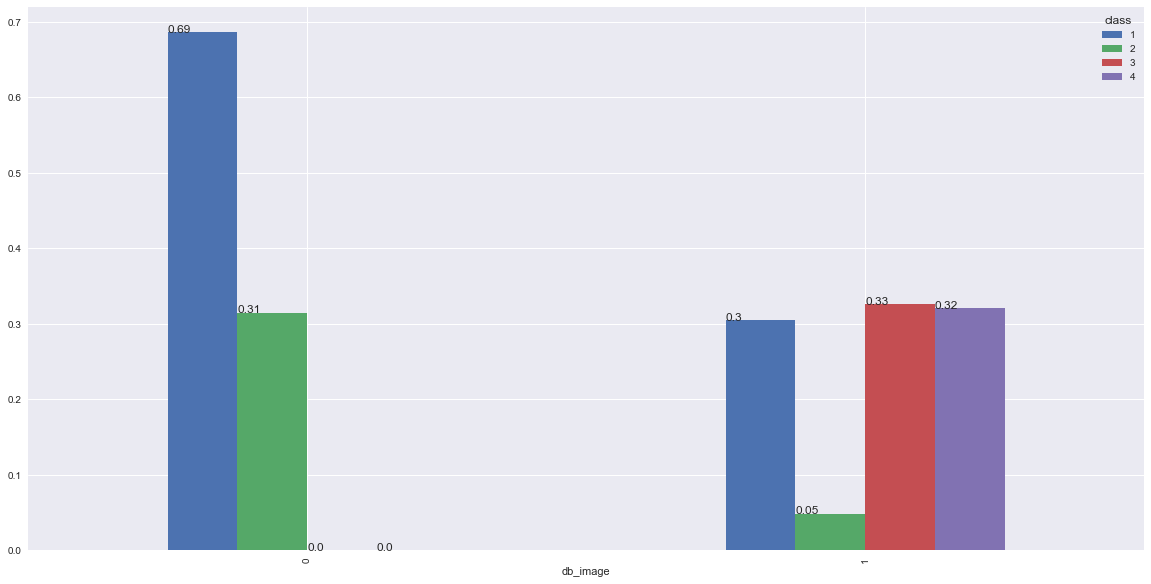

In [73]:
my_barplot('db_image')

In [75]:
# as we can see, none of projects without image is successful
# it suggests that image_url column does not mean whether there is an image and can contain future data, so we can't use it
# also we have already count of images from description
# the same can be expected from video_url
df.drop(['db_image', 'db_video_url'], axis=1, inplace=True)

### 6. adding new features

# TODO